In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

The three reactions to be simulated:

Polystyrene -> Styrene

Polystyrene -> Toluene

Polystyrene -> Ethylbenzene (Benzene)

Brian Lejeune/Prof. West

In [2]:
#Polystyrene Properties

PS_MW = 311600
PS_Polydisperity = 2.39
PS_Density = 1030 #kg/m^3
PS_HeatVal = 49 #MJ/kg

#Source Paper Reactor Properties

Rctr_Pressure = 10^(-1) #Pa
Rctr_TempLow = 613 #K
Rctr_TempHigh = 663 #K
Rctr_HeatRate1 = 3.33E-2
Rctr_HeatRate2 = 8.03E-2
Rctr_HeatRate3 = 1.67E-1

Rctr_Ht = 0.34 #m
Rctr_Hc = 0.205 #m
Rctr_gam = 28
Rctr_Dc = 0.123 #m
Rctr_Di = 0.02 #m
Rctr_Do = 0.01 #m

#Our Reactor Properties
Pyrocycle_T = 623.15 #K

#Kinetic Properties

PS_Ea = 83 #kJ/mol
PS_ko = 1.82E4 #s^-1

Sty_Ea = 132 #kJ/mol
Sty_ko = 5.08E7 #s^-1

Met_Ea = 126 #kJ/mol
Met_ko = 2.1E7 #s^-1

Ben_Ea = 123 #kJ/mol
Ben_ko = 1.47E7 #s^-1

Tol_Ea = 122 #kJ/mol
Tol_ko = 1.19E7 #s^-1

#Constants
R = 8.314E-3 #kJ/K*mol

In [3]:
#Reaction Rate Calculations for Individual Products

def PSReaction(C_int):
    PS = C_int
    
    r = PS_ko * math.e**(-1 * PS_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def StyReaction(C_int):
    PS = C_int
    
    r = Sty_ko * math.e**(-1 * Sty_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def MetReaction(C_int):
    PS = C_int
    
    r = Met_ko * math.e**(-1 * Met_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def BenReaction(C_int):
    PS = C_int
    
    r = Ben_ko * math.e**(-1 * Ben_Ea/(R * Pyrocycle_T)) * PS
    
    return r

def TolReaction(C_int):
    PS = C_int
    
    r = Tol_ko * math.e**(-1 * Tol_Ea/(R * Pyrocycle_T)) * PS
    
    return r

In [4]:
#Reaction Kinetics for Overall Reaction

def TotalReaction(C_array,t):
    PS = C_array[0]
    
    #Establishing Reaction Rates from initial PS feed
    
    Sty_r = StyReaction(PS)
    #Met_r = MetReaction(PS)
    Ben_r = BenReaction(PS)
    Tol_r = TolReaction(PS)
    
    #Obtaining Rate of Generation for each species
    
    dPSdt = -1 * Sty_r - Ben_r - Tol_r
    dStydt = Sty_r
    #dMetdt = Met_r
    dBendt = Ben_r
    dToldt = Tol_r
    
    return [dPSdt, dStydt, dBendt, dToldt]

In [5]:
#Integrating Overall Reaction

W_initial = [10, 0, 0, 0]
t_interval = np.linspace(0,1000)

Y_out_PS = odeint(TotalReaction, W_initial, t_interval)

In [6]:
Y_out_PS

array([[10.        ,  0.        ,  0.        ,  0.        ],
       [ 9.62713251,  0.08756593,  0.14395538,  0.14134619],
       [ 9.26816807,  0.1718668 ,  0.28254312,  0.27742202],
       [ 8.92258825,  0.25302436,  0.41596337,  0.40842402],
       [ 8.58989397,  0.33115583,  0.54440881,  0.53454139],
       [ 8.26960478,  0.40637402,  0.66806494,  0.65595626],
       [ 7.96125813,  0.47878758,  0.78711034,  0.77284395],
       [ 7.66440873,  0.54850106,  0.90171692,  0.88537329],
       [ 7.37862789,  0.61561516,  1.01205019,  0.99370676],
       [ 7.10350288,  0.68022679,  1.11826949,  1.09800084],
       [ 6.83863637,  0.74242927,  1.22052823,  1.19840614],
       [ 6.58364586,  0.80231242,  1.31897407,  1.29506765],
       [ 6.33816313,  0.85996272,  1.41374919,  1.38812496],
       [ 6.10183364,  0.91546343,  1.50499045,  1.47771248],
       [ 5.87431612,  0.9688947 ,  1.59282962,  1.56395956],
       [ 5.65528199,  1.02033369,  1.67739356,  1.64699077],
       [ 5.44441492,  1.

Text(0.5, 1.0, 'Plastic Mass vs. Time for Overall Kinetics Reaction')

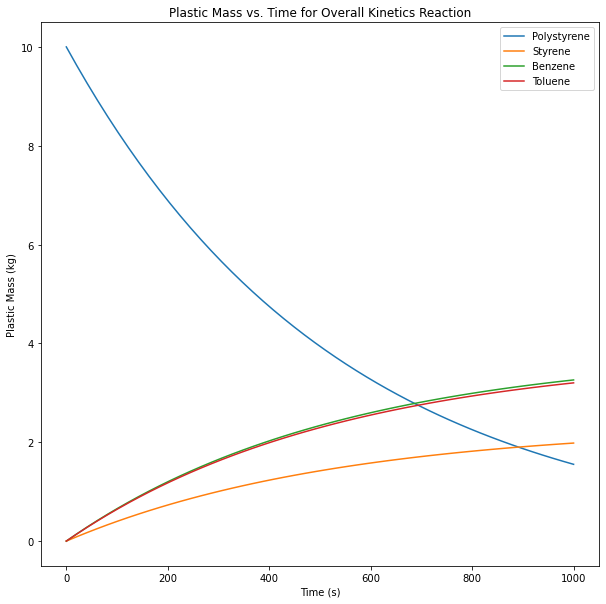

In [7]:
#Plotting the Concentrations of the Reactant and Products
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(t_interval, Y_out_PS)
ax.legend(['Polystyrene', 'Styrene', 'Benzene', 'Toluene'])
ax.set_ylabel('Plastic Mass (kg)')
ax.set_xlabel('Time (s)')
ax.set_title('Plastic Mass vs. Time for Overall Kinetics Reaction')